# Analise dos dados de chuva da caatinga

Importando bibliotecas

In [ ]:
# Iniciando as bibliotecas usadas para montar um sistema de aprendizado de máquina chamado árvore de decisão
# No qual tem como objetivo criar um "raciocínio" das informações de saída e entrada e fornecer um método no qual seja possivel prever informações 
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

Mounted at /content/drive


In [ ]:
origem = 'drive/My Drive/Meus arquivos pessoais/CNPq/dados_eto.xlsx'
planilha = pd.read_excel(origem)
#csv(origem, sep=';')
plt.style.use("seaborn-bright")
#'classic')

In [ ]:
planilha.head()

,Year,DoY,DoY_cont,Hour,date,Chuva,Tair,UR,es,ew,DPV,Pressao_atmosferica,Pressao_atmosferica.1,temp_solo,Velocidade_do_vento,Rg_ou_SW,Rg_ou_SW2,emissividade,LW_baixo,LW_cima,Rn,LE,H,SEVolt_Avg,G,NEE,u_star,W_10cm,W_20cm,W_30cm,W_40cm,W_50cm,Evotranspiracao_potencial,Delta,Evotranspiracao_real,meses
0,2015,1,366,11.5,2015-01-01 11:30:00,0.0,29.875,36.077,4212.738138,1519.829538,2692.908600,96.91197,96911.97,29.10,2.0278,966.55547,110.17304,0.827989,336.110111,536.792541,655.7,62.642,413.150,7.822,174.85401,-12.3330,0.69988,0.043,0.048,0.056,0.062,0.054,93.898559,0.241849,0.046023,0
1,2015,1,366,12.0,2015-01-01 12:00:00,0.0,31.091,31.008,4515.919576,1400.296342,3115.623234,96.85780,96857.80,30.07,2.1029,1032.44969,117.84648,0.815610,341.361673,552.064883,703.9,26.785,80.685,6.764,190.72627,-6.1410,0.57287,0.043,0.048,0.056,0.062,0.054,100.057310,0.256911,0.019679,0
2,2015,1,366,10.5,2015-01-01 10:30:00,0.0,28.176,47.319,3818.839333,1807.036584,2011.802749,96.96632,96966.32,27.60,2.1435,928.27667,105.71544,0.856487,329.040410,523.901640,627.7,129.340,360.670,5.320,165.63361,-7.4125,0.55694,0.043,0.048,0.056,0.062,0.054,86.383161,0.222051,0.095025,0
3,2015,1,366,11.0,2015-01-01 11:00:00,0.0,29.329,40.266,4082.469144,1643.847026,2438.622119,96.94789,96947.89,28.11,1.8924,993.35063,113.29336,0.839676,333.870249,538.627519,675.3,198.790,459.580,5.109,181.30829,-11.1830,0.77245,0.043,0.048,0.056,0.062,0.054,98.275975,0.235332,0.146050,0
4,2015,1,366,10.0,2015-01-01 10:00:00,0.0,27.101,52.994,3586.520812,1900.640839,1685.879973,96.98846,96988.46,26.88,2.0934,856.23050,97.32560,0.867555,324.504510,508.409410,575.0,282.060,12.262,4.093,148.27950,-3.2308,0.53155,0.043,0.048,0.056,0.062,0.054,79.479019,0.210242,0.207228,0


In [ ]:
planilha.shape

(17511, 36)

In [ ]:
dados = planilha.dropna(axis=0, how='any') # Remover qualquer linhas que possua NaN (células vazias)

In [ ]:
dados.head()

,Year,DoY,DoY_cont,Hour,date,Chuva,Tair,UR,es,ew,DPV,Pressao_atmosferica,Pressao_atmosferica.1,temp_solo,Velocidade_do_vento,Rg_ou_SW,Rg_ou_SW2,emissividade,LW_baixo,LW_cima,Rn,LE,H,SEVolt_Avg,G,NEE,u_star,W_10cm,W_20cm,W_30cm,W_40cm,W_50cm,Evotranspiracao_potencial,Delta,Evotranspiracao_real,meses
0,2015,1,366,11.5,2015-01-01 11:30:00,0.0,29.875,36.077,4212.738138,1519.829538,2692.908600,96.91197,96911.97,29.10,2.0278,966.55547,110.17304,0.827989,336.110111,536.792541,655.7,62.642,413.150,7.822,174.85401,-12.3330,0.69988,0.043,0.048,0.056,0.062,0.054,93.898559,0.241849,0.046023,0
1,2015,1,366,12.0,2015-01-01 12:00:00,0.0,31.091,31.008,4515.919576,1400.296342,3115.623234,96.85780,96857.80,30.07,2.1029,1032.44969,117.84648,0.815610,341.361673,552.064883,703.9,26.785,80.685,6.764,190.72627,-6.1410,0.57287,0.043,0.048,0.056,0.062,0.054,100.057310,0.256911,0.019679,0
2,2015,1,366,10.5,2015-01-01 10:30:00,0.0,28.176,47.319,3818.839333,1807.036584,2011.802749,96.96632,96966.32,27.60,2.1435,928.27667,105.71544,0.856487,329.040410,523.901640,627.7,129.340,360.670,5.320,165.63361,-7.4125,0.55694,0.043,0.048,0.056,0.062,0.054,86.383161,0.222051,0.095025,0
3,2015,1,366,11.0,2015-01-01 11:00:00,0.0,29.329,40.266,4082.469144,1643.847026,2438.622119,96.94789,96947.89,28.11,1.8924,993.35063,113.29336,0.839676,333.870249,538.627519,675.3,198.790,459.580,5.109,181.30829,-11.1830,0.77245,0.043,0.048,0.056,0.062,0.054,98.275975,0.235332,0.146050,0
4,2015,1,366,10.0,2015-01-01 10:00:00,0.0,27.101,52.994,3586.520812,1900.640839,1685.879973,96.98846,96988.46,26.88,2.0934,856.23050,97.32560,0.867555,324.504510,508.409410,575.0,282.060,12.262,4.093,148.27950,-3.2308,0.53155,0.043,0.048,0.056,0.062,0.054,79.479019,0.210242,0.207228,0


In [ ]:
dados.shape

(11945, 36)

In [ ]:
dados['date'] = pd.to_datetime(dados['date'], format="%Y-%m-%d %H:%M:%S")
dados['Year'] = pd.to_datetime(dados['Year'], format="%Y")
#dados['meses'] = pd.to_datetime(dados['meses'], format="%Y-%m")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dados['meses'] = pd.to_datetime(dados['date']).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados['meses'] = pd.to_datetime(dados['meses'], format='%Y-%m-%d').apply(lambda x: x.strftime('%Y-%m'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11945 entries, 0 to 17510
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       11945 non-null  datetime64[ns]
 1   DoY                        11945 non-null  int64         
 2   DoY_cont                   11945 non-null  int64         
 3   Hour                       11945 non-null  float64       
 4   date                       11945 non-null  datetime64[ns]
 5   Chuva                      11945 non-null  float64       
 6   Tair                       11945 non-null  float64       
 7   UR                         11945 non-null  float64       
 8   es                         11945 non-null  float64       
 9   ew                         11945 non-null  float64       
 10  DPV                        11945 non-null  float64       
 11  Pressao_atmosferica        11945 non-null  float64       
 12  Pres

In [ ]:
dados['meses']

0        2015-01
1        2015-01
2        2015-01
3        2015-01
4        2015-01
          ...   
17506    2014-12
17507    2014-12
17508    2014-12
17509    2014-12
17510    2014-12
Name: meses, Length: 11945, dtype: object

In [ ]:

dados["W_10cm"].value_counts().sort_index()

0.000      1
0.032    104
0.033    329
0.034    740
0.035    665
        ... 
0.150      2
0.157      2
0.162      2
0.164      2
0.182      2
Name: W_10cm, Length: 123, dtype: int64

In [ ]:
dados["W_50cm"].value_counts().sort_index()

0.000       1
0.049     252
0.050    1581
0.051    4849
0.052    1206
         ... 
0.136      20
0.137      24
0.138       8
0.139       2
0.140       2
Name: W_50cm, Length: 93, dtype: int64

In [ ]:
dados["Tair"].value_counts().sort_index()

13.080    1
14.860    1
15.200    1
15.510    1
15.590    1
         ..
34.280    1
34.310    1
34.339    1
35.808    1
39.580    1
Name: Tair, Length: 4043, dtype: int64

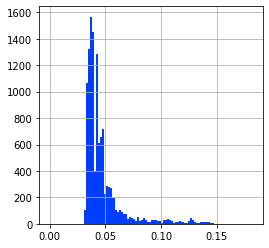

In [ ]:
#plt.xlim(-0.25,)
dados["W_10cm"].hist(bins = 100, figsize = (4,4))

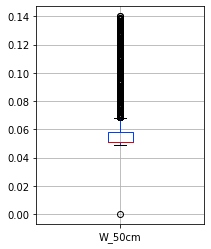

In [ ]:
dados.boxplot(figsize=(3, 4),column=['W_50cm'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'UMIDADE DO SOLO EM 10 cm')

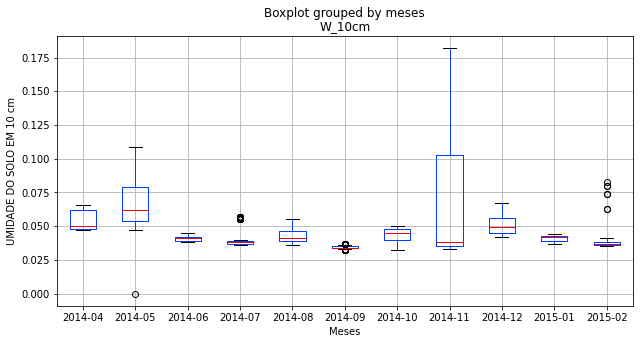

In [ ]:
dados.boxplot(figsize=(10, 5),column=['W_10cm'],by = 'meses', grid=True)
plt.xlabel("Meses")
plt.ylabel("UMIDADE DO SOLO EM 10 cm")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Chuva(mm)')

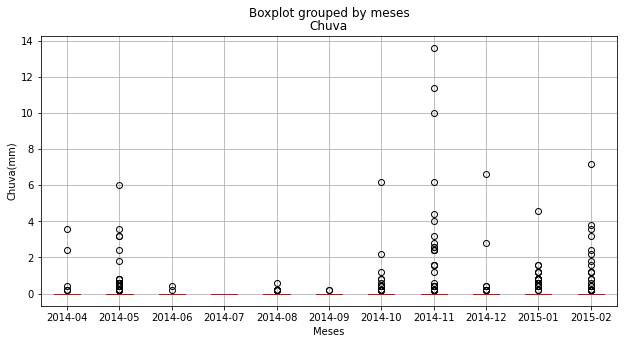

In [ ]:
dados.boxplot(figsize=(10, 5),column=['Chuva'],by = 'meses', grid=True)
plt.xlabel("Meses")
plt.ylabel("Chuva(mm)")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Umidade do solo em 50 cm')

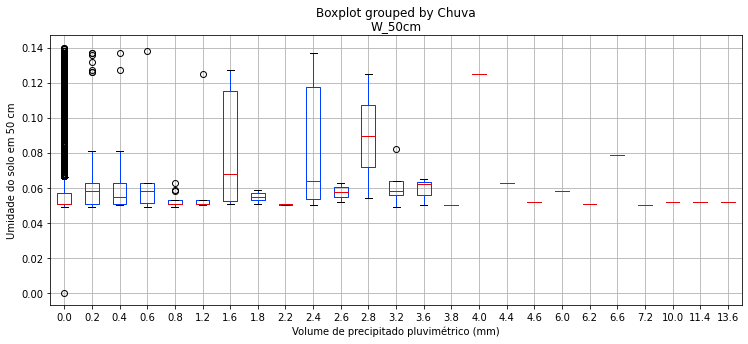

In [ ]:
dados.boxplot(figsize=(12, 5),column=['W_50cm'],by = 'Chuva', grid=True)
plt.xlabel("Volume de precipitado pluvimétrico (mm)")
plt.ylabel("Umidade do solo em 50 cm")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Volume de precipitado pluvimétrico (mm)')

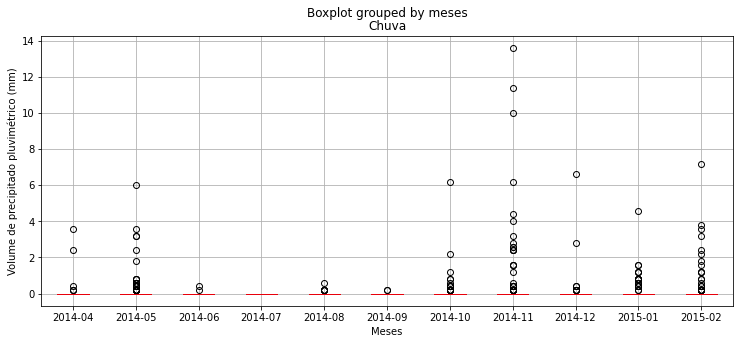

In [ ]:
dados.boxplot(figsize=(12, 5),column=['Chuva'],by = 'meses', grid=True)
plt.xlabel("Meses")
plt.ylabel("Volume de precipitado pluvimétrico (mm)")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Temperatura do ar (ºC)')

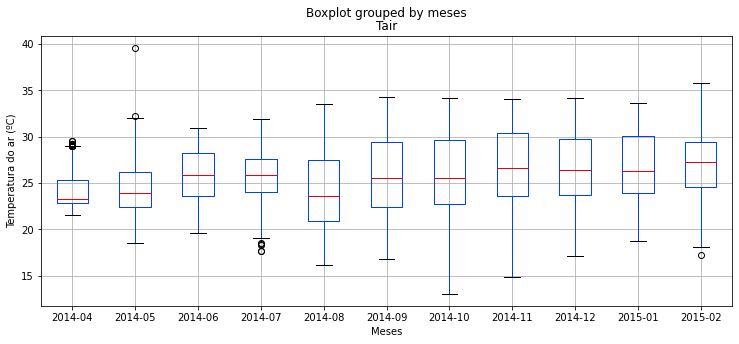

In [ ]:
dados.boxplot(figsize=(12, 5),column=['Tair'],by = 'meses', grid=True)
plt.xlabel("Meses")
plt.ylabel("Temperatura do ar (ºC)")

In [ ]:
dados["Tair"].value_counts(normalize=True).sort_index()

13.080    0.000084
14.860    0.000084
15.200    0.000084
15.510    0.000084
15.590    0.000084
            ...   
34.280    0.000084
34.310    0.000084
34.339    0.000084
35.808    0.000084
39.580    0.000084
Name: Tair, Length: 4043, dtype: float64

In [ ]:
dados["Chuva"].value_counts(normalize=True).sort_index()

0.0     0.986522
0.2     0.005190
0.4     0.002344
0.6     0.000921
0.8     0.001088
1.2     0.000670
1.6     0.000502
1.8     0.000167
2.2     0.000167
2.4     0.000502
2.6     0.000167
2.8     0.000167
3.2     0.000335
3.6     0.000251
3.8     0.000084
4.0     0.000084
4.4     0.000084
4.6     0.000084
6.0     0.000084
6.2     0.000167
6.6     0.000084
7.2     0.000084
10.0    0.000084
11.4    0.000084
13.6    0.000084
Name: Chuva, dtype: float64

In [ ]:
dados["W_10cm"].value_counts(normalize=True).sort_index()

0.000    0.000084
0.032    0.008707
0.033    0.027543
0.034    0.061951
0.035    0.055672
           ...   
0.150    0.000167
0.157    0.000167
0.162    0.000167
0.164    0.000167
0.182    0.000167
Name: W_10cm, Length: 123, dtype: float64

In [ ]:
dados["W_50cm"].value_counts(normalize=True).sort_index()

0.000    0.000084
0.049    0.021097
0.050    0.132357
0.051    0.405944
0.052    0.100963
           ...   
0.136    0.001674
0.137    0.002009
0.138    0.000670
0.139    0.000167
0.140    0.000167
Name: W_50cm, Length: 93, dtype: float64

In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label = None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xticks(fontsize = 16)
    plt.legend()
    plt.xlabel("Time")
    plt.yticks(fontsize = 16)
    plt.ylabel("Value")
    plt.grid(True)    

No handles with labels found to put in legend.


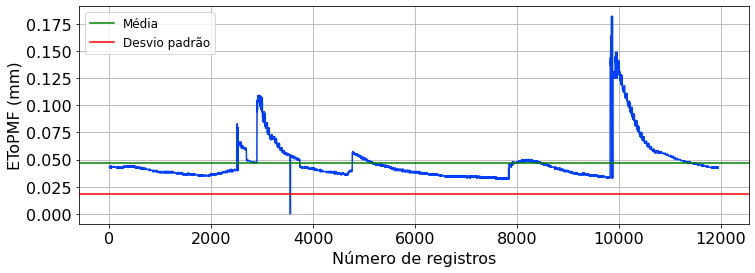

In [ ]:
plt.figure(figsize=(12, 4))
plot_series(np.linspace(1,len(dados),len(dados)),dados.W_10cm,'-')
plt.axhline(y=dados.W_10cm.mean(), c = 'g', label = 'Média')
plt.axhline(y=dados.W_10cm.std(), c = 'r', label = 'Desvio padrão')
plt.xlabel("Número de registros", fontsize = 16)
plt.ylabel("EToPMF (mm)", fontsize = 16)
#plt.ylim(0,)
plt.legend(loc='upper left',fontsize = 12)

In [ ]:
dados["W_10cm"].mean() # média simples

0.04715906236919268

In [ ]:
dados["W_10cm"].std() # Retorna o desvio padrão da amostra sobre o eixo solicitado

0.018434356533257513

No handles with labels found to put in legend.


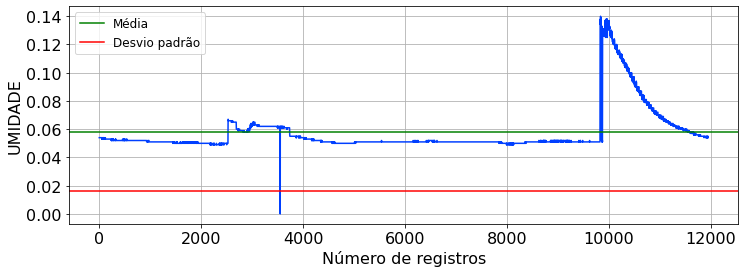

In [ ]:
plt.figure(figsize=(12, 4))
plot_series(np.linspace(1,len(dados),len(dados)),dados.W_50cm,'-')
plt.axhline(y=dados.W_50cm.mean(), c = 'g', label = 'Média')
plt.axhline(y=dados.W_50cm.std(), c = 'r', label = 'Desvio padrão')
plt.xlabel("Número de registros", fontsize = 16)
plt.ylabel("UMIDADE", fontsize = 16)
#plt.ylim(0,)
plt.legend(loc='upper left',fontsize = 12)

In [ ]:
dados["W_50cm"].mean() # média simples

0.057684219338632665

In [ ]:
dados["W_50cm"].std() # Retorna o desvio padrão da amostra sobre o eixo solicitado

0.01595137368536664

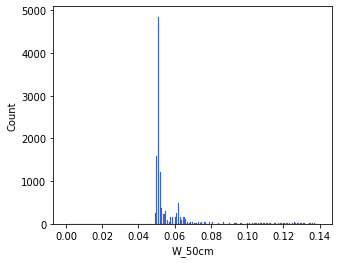

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(dados, x = "W_50cm")

Normalizando os dados de fechamento

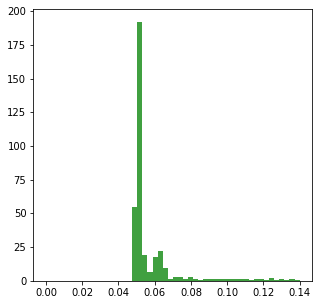

Média dos valores normalizados 0.051315954174077374
Desvio Padrão dos valores normalizados 0.0038081300095364253


In [ ]:
series = dados.W_50cm
plt.figure(figsize=(5,5))
plt.hist(series, 50, density=True, facecolor='g', alpha=0.75)
#plt.xlim(-1,)
plt.show()
iteração = np.linspace(1,len(dados),len(dados))
percent_train = .7
divisao = int(percent_train*len(dados))
ln_series = np.log(series+1)
y_treino = ln_series[:divisao]
xm = y_treino.mean()
Sx = y_treino.std()
print("Média dos valores normalizados", xm)
print("Desvio Padrão dos valores normalizados",Sx)
series = (ln_series - xm)/Sx

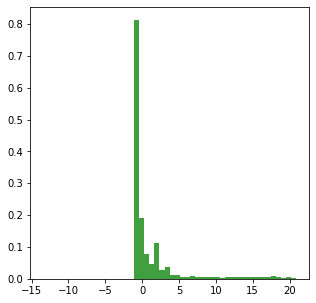

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(series, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

In [ ]:
dados['series'] = series

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados.head()

,Year,DoY,DoY_cont,Hour,date,Chuva,Tair,UR,es,ew,DPV,Pressao_atmosferica,Pressao_atmosferica.1,temp_solo,Velocidade_do_vento,Rg_ou_SW,Rg_ou_SW2,emissividade,LW_baixo,LW_cima,Rn,LE,H,SEVolt_Avg,G,NEE,u_star,W_10cm,W_20cm,W_30cm,W_40cm,W_50cm,Evotranspiracao_potencial,Delta,Evotranspiracao_real,meses,series
0,2015-01-01,1,366,11.5,2015-01-01 11:30:00,0.0,29.875,36.077,4212.738138,1519.829538,2692.908600,96.91197,96911.97,29.10,2.0278,966.55547,110.17304,0.827989,336.110111,536.792541,655.7,62.642,413.150,7.822,174.85401,-12.3330,0.69988,0.043,0.048,0.056,0.062,0.054,93.898559,0.241849,0.046023,2015-01,0.335203
1,2015-01-01,1,366,12.0,2015-01-01 12:00:00,0.0,31.091,31.008,4515.919576,1400.296342,3115.623234,96.85780,96857.80,30.07,2.1029,1032.44969,117.84648,0.815610,341.361673,552.064883,703.9,26.785,80.685,6.764,190.72627,-6.1410,0.57287,0.043,0.048,0.056,0.062,0.054,100.057310,0.256911,0.019679,2015-01,0.335203
2,2015-01-01,1,366,10.5,2015-01-01 10:30:00,0.0,28.176,47.319,3818.839333,1807.036584,2011.802749,96.96632,96966.32,27.60,2.1435,928.27667,105.71544,0.856487,329.040410,523.901640,627.7,129.340,360.670,5.320,165.63361,-7.4125,0.55694,0.043,0.048,0.056,0.062,0.054,86.383161,0.222051,0.095025,2015-01,0.335203
3,2015-01-01,1,366,11.0,2015-01-01 11:00:00,0.0,29.329,40.266,4082.469144,1643.847026,2438.622119,96.94789,96947.89,28.11,1.8924,993.35063,113.29336,0.839676,333.870249,538.627519,675.3,198.790,459.580,5.109,181.30829,-11.1830,0.77245,0.043,0.048,0.056,0.062,0.054,98.275975,0.235332,0.146050,2015-01,0.335203
4,2015-01-01,1,366,10.0,2015-01-01 10:00:00,0.0,27.101,52.994,3586.520812,1900.640839,1685.879973,96.98846,96988.46,26.88,2.0934,856.23050,97.32560,0.867555,324.504510,508.409410,575.0,282.060,12.262,4.093,148.27950,-3.2308,0.53155,0.043,0.048,0.056,0.062,0.054,79.479019,0.210242,0.207228,2015-01,0.335203


Aplicando o teste de correlação

In [ ]:
dados.columns.values

array(['Year', 'DoY', 'DoY_cont', 'Hour', 'date', 'Chuva', 'Tair', 'UR',
       'es', 'ew', 'DPV', 'Pressao_atmosferica', 'Pressao_atmosferica.1',
       'temp_solo', 'Velocidade_do_vento', 'Rg_ou_SW', 'Rg_ou_SW2',
       'emissividade', 'LW_baixo', 'LW_cima', 'Rn', 'LE', 'H',
       'SEVolt_Avg', 'G', 'NEE', 'u_star', 'W_10cm', 'W_20cm', 'W_30cm',
       'W_40cm', 'W_50cm', 'Evotranspiracao_potencial', 'Delta',
       'Evotranspiracao_real', 'meses', 'series'], dtype=object)

In [ ]:
dadostestes = ['Year', 'DoY', 'DoY_cont', 'Hour', 'date', 'Chuva', 'Tair', 'UR',
       'es', 'ew', 'DPV', 'Pressao_atmosferica', 'Pressao_atmosferica.1',
       'temp_solo', 'Velocidade_do_vento', 'Rg_ou_SW', 'Rg_ou_SW2',
       'emissividade', 'LW_baixo', 'LW_cima', 'Rn', 'LE', 'H',
       'SEVolt_Avg', 'G', 'NEE', 'u_star', 'W_10cm', 'W_20cm', 'W_30cm',
       'W_40cm', 'W_50cm', 'Evotranspiracao_potencial', 'Delta',
       'Evotranspiracao_real', 'series']
dadostestes = dados[dadostestes]

In [ ]:
correlacao = dadostestes.corr()
correlacao

,DoY,DoY_cont,Hour,Chuva,Tair,UR,es,ew,DPV,Pressao_atmosferica,Pressao_atmosferica.1,temp_solo,Velocidade_do_vento,Rg_ou_SW,Rg_ou_SW2,emissividade,LW_baixo,LW_cima,Rn,LE,H,SEVolt_Avg,G,NEE,u_star,W_10cm,W_20cm,W_30cm,W_40cm,W_50cm,Evotranspiracao_potencial,Delta,Evotranspiracao_real,series
DoY,1.000000,-0.115808,0.001579,-0.003080,0.001210,-0.101514,0.010238,-0.197953,0.072750,-0.047326,-0.047326,0.164942,0.154574,0.030071,0.030519,-0.167968,-0.002087,0.020766,0.031640,-0.024969,0.023382,0.023246,0.031640,-0.008809,0.115996,0.190638,0.130998,0.254690,0.293859,0.327575,0.019680,0.008852,-0.018264,0.328617
DoY_cont,-0.115808,1.000000,-0.061066,0.010748,0.233450,-0.206123,0.235613,-0.082023,0.219296,-0.404770,-0.404770,0.370074,-0.203978,0.027945,0.030116,-0.142574,0.234380,0.046259,0.035770,-0.027042,0.046575,-0.031767,0.035770,-0.042934,0.084707,-0.131442,-0.171922,-0.034395,0.013884,0.056460,0.072390,0.235431,-0.024540,0.054565
Hour,0.001579,-0.061066,1.000000,0.000344,0.427392,-0.412824,0.414258,-0.218666,0.409782,-0.120598,-0.120598,0.315938,0.188782,0.017328,0.017839,-0.314765,0.423904,0.090524,0.019151,-0.002508,-0.055658,-0.000283,0.019151,0.015523,0.027384,0.005541,0.004300,-0.000996,-0.005311,-0.004630,0.030272,0.416701,0.011439,-0.004719
Chuva,-0.003080,0.010748,0.000344,1.000000,-0.096036,0.052313,-0.082990,-0.022557,-0.060510,-0.038483,-0.038483,-0.049580,-0.027263,-0.038269,-0.038563,0.006274,-0.094801,-0.047899,-0.039263,0.010963,-0.026814,-0.077557,-0.039263,0.031450,-0.001086,0.103157,0.095170,0.077853,0.039292,0.019481,-0.039864,-0.084897,0.005718,0.019425
Tair,0.001210,0.233450,0.427392,-0.096036,1.000000,-0.875453,0.994738,-0.393626,0.941241,-0.390308,-0.390308,0.709386,0.175926,0.546122,0.546026,-0.630087,0.999684,0.660624,0.544719,0.140782,0.296998,0.476856,0.544719,-0.360187,0.288577,-0.093604,-0.128730,-0.049078,-0.023831,-0.010256,0.578612,0.996242,0.169749,-0.010207
UR,-0.101514,-0.206123,-0.412824,0.052313,-0.875453,1.000000,-0.878523,0.769190,-0.968377,0.225814,0.225814,-0.704656,-0.290333,-0.480119,-0.480590,0.916512,-0.865974,-0.572573,-0.480900,-0.028373,-0.264741,-0.429406,-0.480900,0.319754,-0.340552,0.209564,0.240362,0.141300,0.123251,0.100286,-0.496272,-0.878842,-0.058140,0.101210
es,0.010238,0.235613,0.414258,-0.082990,0.994738,-0.878523,1.000000,-0.424774,0.955673,-0.397796,-0.397796,0.711924,0.164669,0.548001,0.547862,-0.653024,0.995654,0.661912,0.546439,0.131523,0.282444,0.468837,0.546439,-0.365824,0.270770,-0.093010,-0.126655,-0.049372,-0.026523,-0.012800,0.583153,0.999873,0.159815,-0.012821
ew,-0.197953,-0.082023,-0.218666,-0.022557,-0.393626,0.769190,-0.424774,1.000000,-0.672493,-0.021094,-0.021094,-0.452139,-0.278980,-0.204997,-0.205866,0.960113,-0.378470,-0.239227,-0.207753,0.156971,-0.076564,-0.185935,-0.207753,0.136727,-0.220488,0.263159,0.275543,0.197189,0.197851,0.172698,-0.199235,-0.420523,0.138870,0.174533
DPV,0.072750,0.219296,0.409782,-0.060510,0.941241,-0.968377,0.955673,-0.672493,1.000000,-0.318347,-0.318347,0.729064,0.225354,0.514675,0.514844,-0.846120,0.937060,0.618932,0.514294,0.056471,0.255806,0.443756,0.514294,-0.343537,0.293070,-0.161625,-0.193159,-0.104494,-0.086030,-0.066631,0.541539,0.954186,0.085488,-0.067245
Pressao_atmosferica,-0.047326,-0.404770,-0.120598,-0.038483,-0.390308,0.225814,-0.397796,-0.021094,-0.318347,1.000000,1.000000,-0.402365,0.371592,0.160636,0.159519,0.089352,-0.396360,0.073752,0.156271,0.000188,0.218840,0.240014,0.156271,-0.170714,0.136258,-0.162314,-0.113827,-0.208190,-0.255185,-0.261845,0.091419,-0.396768,-0.002182,-0.263418


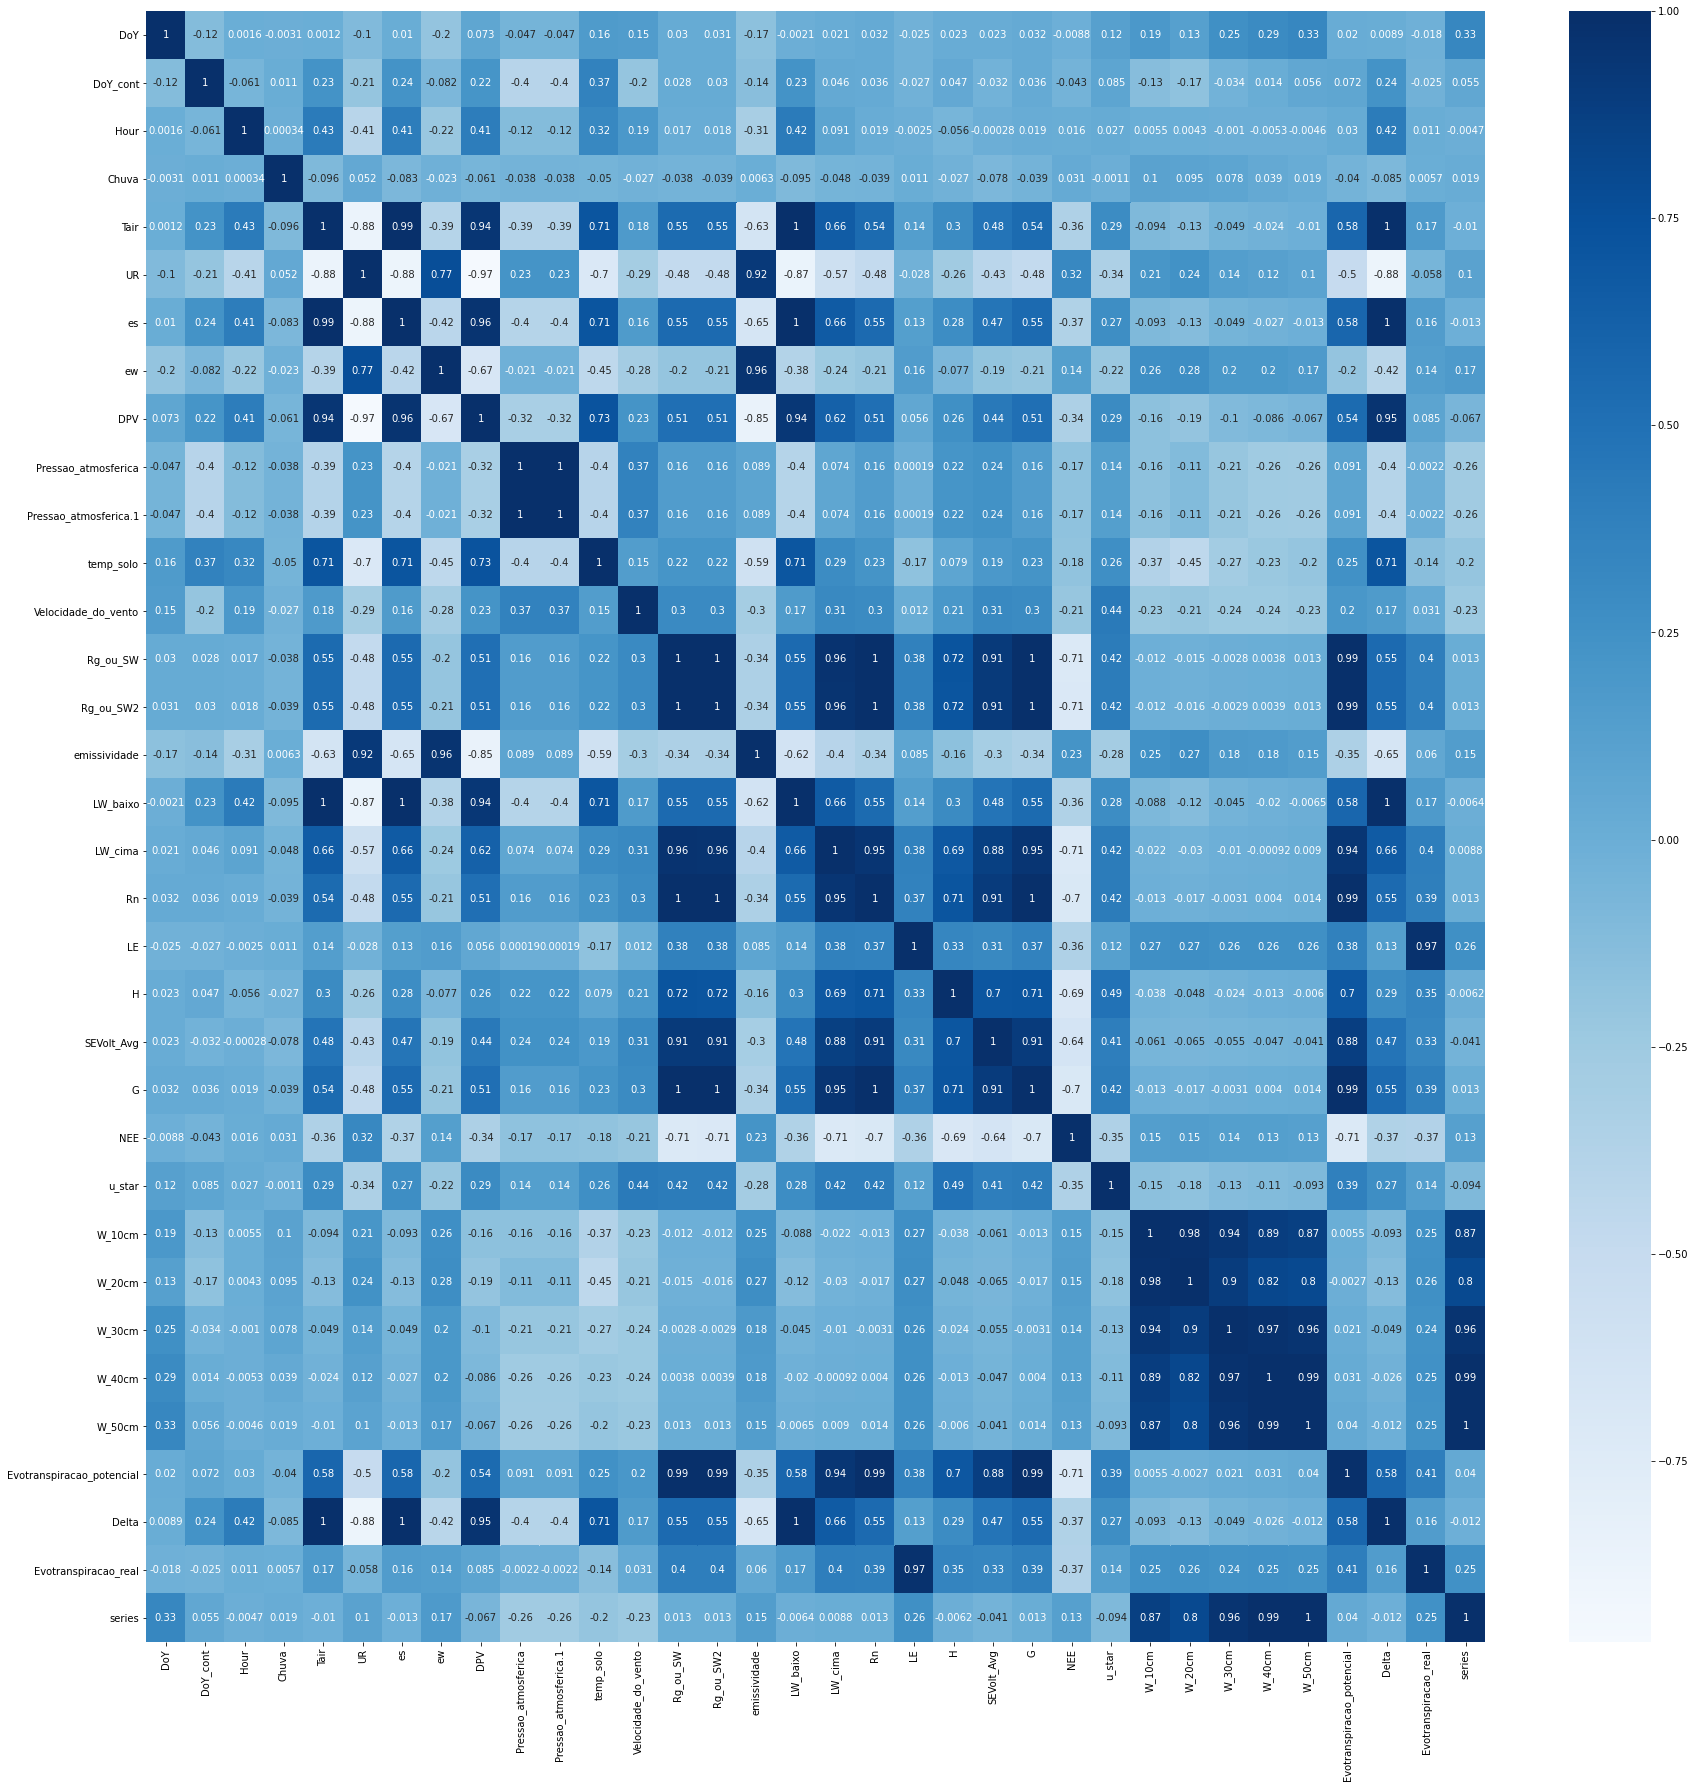

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

In [ ]:
#plt.figure(figsize=(10, 10))
#sns.pairplot(dadostestes)

# Organizando os dados

In [ ]:
dados.columns.values

array(['Year', 'DoY', 'DoY_cont', 'Hour', 'date', 'Chuva', 'Tair', 'UR',
       'es', 'ew', 'DPV', 'Pressao_atmosferica', 'Pressao_atmosferica.1',
       'temp_solo', 'Velocidade_do_vento', 'Rg_ou_SW', 'Rg_ou_SW2',
       'emissividade', 'LW_baixo', 'LW_cima', 'Rn', 'LE', 'H',
       'SEVolt_Avg', 'G', 'NEE', 'u_star', 'W_10cm', 'W_20cm', 'W_30cm',
       'W_40cm', 'W_50cm', 'Evotranspiracao_potencial', 'Delta',
       'Evotranspiracao_real', 'meses', 'series'], dtype=object)

# Support vector machine

In [ ]:
dados.columns.values

array(['Year', 'DoY', 'DoY_cont', 'Hour', 'date', 'Chuva', 'Tair', 'UR',
       'es', 'ew', 'DPV', 'Pressao_atmosferica', 'Pressao_atmosferica.1',
       'temp_solo', 'Velocidade_do_vento', 'Rg_ou_SW', 'Rg_ou_SW2',
       'emissividade', 'LW_baixo', 'LW_cima', 'Rn', 'LE', 'H',
       'SEVolt_Avg', 'G', 'NEE', 'u_star', 'W_10cm', 'W_20cm', 'W_30cm',
       'W_40cm', 'W_50cm', 'Evotranspiracao_potencial', 'Delta',
       'Evotranspiracao_real', 'meses', 'series'], dtype=object)

In [ ]:
#entrada = [['tempmedpoceano', 'laninalanino', 'pressaoatmPa', 'tempsolo', 'velocidadedovento']]
# saida = ['ultimo']  já que normalizamos os dados de chuva, então esses não vão ser usados

#[['DoY', 'Tair', 'UR', 'Velocidade_do_vento', 'Rn']]
#dados[entrada]
#valor_saida = dados[saida]
# já que normalizamos os dados
dados = dados.dropna(axis=0, how='any') # Remover qualquer linhas que possua NaN (células vazias)
valor_saida = dados[['series']]
valor_entrada = dados[['W_10cm']] 

In [ ]:
x = valor_entrada
y = valor_saida

Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split
#qualquer valor
SEED = 0 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state=SEED)


In [ ]:
len(x_treino)

8361

In [ ]:
len(y_treino)

8361

In [ ]:
x_treino

,W_10cm
15680,0.105
14823,0.036
14971,0.035
1645,0.036
14956,0.035
...,...
10205,0.055
6162,0.069
15374,0.157
16331,0.056


In [ ]:
y_treino

,series
15680,15.344778
14823,-0.413290
14971,-0.413290
1645,-0.413290
14956,-0.413290
...,...
10205,-0.663263
6162,2.320816
15374,20.471040
16331,6.003851


In [ ]:
from sklearn import svm
modelo = svm.SVR()
modelo.fit(x_treino, y_treino.values.ravel())
predicoes = modelo.predict(x_teste)

# Métricas de avaliação do teste ( SVM )

In [ ]:
temporario = y_teste.copy()
temporario

,series
12814,-0.413290
16247,6.491042
16137,7.947216
16606,3.308020
2181,-0.663263
...,...
1464,-0.413290
13297,-0.663263
13731,-0.663263
11351,-0.413290


In [ ]:
temporario['series'] = predicoes.reshape(3584,1).copy()
temporario

,series
12814,-0.457865
16247,2.857824
16137,3.227153
16606,1.467093
2181,-0.513089
...,...
1464,-0.454352
13297,0.556984
13731,0.982776
11351,-0.454352


In [ ]:
predicoes.reshape(3584,1)

array([[-0.45786482],
       [ 2.8578236 ],
       [ 3.22715251],
       ...,
       [ 0.98277588],
       [-0.45435152],
       [-0.51308889]])

In [ ]:
y_teste

,series
12814,-0.413290
16247,6.491042
16137,7.947216
16606,3.308020
2181,-0.663263
...,...
1464,-0.413290
13297,-0.663263
13731,-0.663263
11351,-0.413290


Encontrando o NSE e o MAE

NSE = series    0.586613
dtype: float64
MAE = 0.8922537162611811


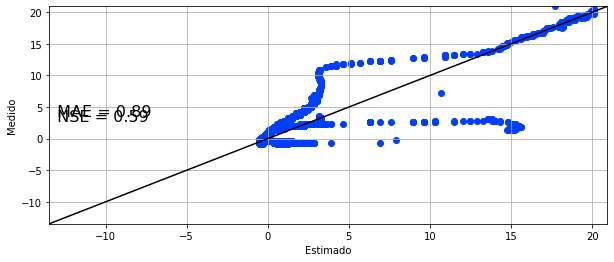

In [ ]:
from sklearn.metrics import mean_absolute_error
#predicoes = predicoes.reshape(1404, 1)
Min = series.min()
Max = series.max()
plt.figure(figsize=(10,4))
plt.scatter(temporario, y_teste)
plt.plot([Min,Max],[Min,Max],'-', c = 'black')
plt.ylim([Min,Max])
plt.xlim([Min,Max])
plt.xticks()
plt.xlabel("Estimado")
plt.yticks()
plt.ylabel("Medido")
plt.grid(True)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)
plt.text(Min+.2,.12*Max+.3," NSE = %.2f"%(NSE(y_teste, temporario)), size = 16)
plt.text(Min+.2,.13*Max+.9," MAE = %.2f"%(mean_absolute_error(y_teste, temporario)), size = 16)
print('NSE =',NSE(y_teste, temporario))
print('MAE =', mean_absolute_error(y_teste, temporario))

In [ ]:
# A eficiência de modelagem Nash e Sutcliffe (NASH e SUTCLIFFE, 1970) limitado (NSE)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)

print('NSE =',NSE(y_teste, temporario))

NSE = series    0.586613
dtype: float64


In [ ]:
# o índice de concordância de Willmott (d)
def d(medido, estimado):
    medido_medio = np.mean( medido )
    s = np.sum( ( estimado - medido )**2 )
    i = np.sum(np.absolute( estimado - medido_medio ) + np.absolute( medido - medido_medio ))
    
    return 1 - s/i

print('d =',d(y_teste, temporario))

d = series    0.11709
dtype: float64


In [ ]:
# coeficiente de correlação de Pearson (r)
def r(medido, estimado):
    medido_medio = np.mean( medido )
    estimado_medio = np.mean( estimado )
    s = np.sum((medido - medido_medio)*(estimado - estimado_medio))
    i = ((np.sum((estimado - estimado_medio)**(2)))**(1/2))*((np.sum((medido - medido_medio)**(2)))**(1/2))

    return s/i

print('r =',r(y_teste, temporario))

r = series    0.867206
dtype: float64


In [ ]:
# O índice de desempenho do modelo (c)
def c(medido, estimado):
    return d(medido, estimado)*r(medido, estimado)

print('c =',c(y_teste, temporario))

c = series    0.101542
dtype: float64


In [ ]:
# Coeficiente de Klinga – Gupta limitado (KGE)
def KGE(medido, estimado):
    desvio_padrao_medido = np.std(medido)
    desvio_padrao_estimado = np.std(estimado)
    estimado_medio = np.mean( estimado )
    kge = 1 - ( (r(medido, estimado) - 1)**2 + ((estimado_medio/medido) - 1)**2 + ((desvio_padrao_estimado/desvio_padrao_medido) - 1)**2 )**(1/2)

    return kge/(2-kge)

print('KGE =',np.mean(KGE(y_teste, temporario)))

KGE = series   -0.366422
dtype: float64


In [ ]:
# R²
def R2(medido, estimado):
    cima = (len(medido)*(np.sum(medido*estimado))-np.sum(medido)*np.sum(estimado))**2
    baixo = (len(medido)*np.sum((medido)**2)-(np.sum(medido))**2)*(len(medido)*np.sum((estimado)**2)-(np.sum(medido))**2)
    r2 = cima/baixo
    return r2

print(f'R² ={R2(y_teste, temporario)}')

R² =series    0.75426
dtype: float64


In [ ]:
#RMSE -  Raiz do Erro Quadrático Médio
def RMSE(medido, estimado):
    rmse = ((1/len(medido))*(np.sum((medido - estimado)**2)))**(1/2)
    return rmse

print(f'RMSE ={RMSE(y_teste, temporario)}')

RMSE =series    2.014742
dtype: float64


outras metricas


In [ ]:
from sklearn.metrics import explained_variance_score
# Variância explicada 
explained_variance_score(y_teste, temporario)

0.7394734063259356

In [ ]:
from sklearn.metrics import max_error
# Erro máximo ( residual )
max_error(y_teste, temporario)

13.833384618298098

In [ ]:
from sklearn.metrics import mean_absolute_error
# Erro médio absoluto MAE
mean_absolute_error(y_teste, temporario)

0.8922537162611811

In [ ]:
from sklearn.metrics import mean_squared_error
# Erro quadrático médio
mean_squared_error(y_teste, temporario)

4.059185338968006

In [ ]:
from sklearn.metrics import r2_score
# score R² 
r2_score(y_teste, temporario)

0.7394531241732669

In [ ]:
#Artur pediu a raiz o r² como parâmetro avaliativo
(r2_score(y_teste, temporario))**(1/2)

0.8599146028375533

In [ ]:
from sklearn.metrics import mean_squared_log_error
# Erro logarítmico médio quadrático
mean_squared_log_error(abs(y_teste), abs(temporario))

0.12160595452301916

In [ ]:
#Erro absoluto mediano 
from sklearn.metrics import median_absolute_error
median_absolute_error(y_teste, temporario)

0.24114004150759835

# A árvore de decisão

In [ ]:
#entrada = [['tempmedpoceano', 'laninalanino', 'pressaoatmPa', 'tempsolo', 'velocidadedovento']]
# saida = ['ultimo']  já que normalizamos os dados de chuva, então esses não vão ser usados

#[['DoY', 'Tair', 'UR', 'Velocidade_do_vento', 'Rn']]
#dados[entrada]
#valor_saida = dados[saida]
# já que normalizamos os dados
valor_saida = dados[['series']]
valor_entrada = dados[['W_10cm']] 

In [ ]:
x = valor_entrada
y = valor_saida

Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split
#qualquer valor
SEED = 0 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state=SEED)


In [ ]:
len(x_treino)

8361

In [ ]:
len(y_treino)

8361

In [ ]:
x_treino

,W_10cm
15680,0.105
14823,0.036
14971,0.035
1645,0.036
14956,0.035
...,...
10205,0.055
6162,0.069
15374,0.157
16331,0.056


In [ ]:
y_treino

,series
15680,15.344778
14823,-0.413290
14971,-0.413290
1645,-0.413290
14956,-0.413290
...,...
10205,-0.663263
6162,2.320816
15374,20.471040
16331,6.003851


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
def regressor_arvore(nivel):
    SEED= 0
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Nivel {nivel} | Treino = {(resultados['train_score']*-1).mean()} | Teste = {(resultados['test_score']*-1).mean()}")
    treino.append((resultados['train_score']*-1).mean())
    teste.append((resultados['test_score']*-1).mean())

In [ ]:
iteracoes = []
treino = []
teste = []
for i in range(1,21):
    resultados = regressor_arvore(i)
    iteracoes.append(i)

Nivel 1 | Treino = 6.470919634519715 | Teste = 6.587746322925429
Nivel 2 | Treino = 3.311802391182804 | Teste = 3.3777684029366375
Nivel 3 | Treino = 2.8055103967931134 | Teste = 2.852410721177658
Nivel 4 | Treino = 2.6852860733839186 | Teste = 2.807657652289885
Nivel 5 | Treino = 2.573974727400421 | Teste = 2.701978075214348
Nivel 6 | Treino = 2.5033328191626114 | Teste = 2.6800813544402122
Nivel 7 | Treino = 2.4378953997663353 | Teste = 2.6367680065417662
Nivel 8 | Treino = 2.38921521007872 | Teste = 2.577578215077306
Nivel 9 | Treino = 2.3745604441432535 | Teste = 2.586701125145685
Nivel 10 | Treino = 2.3686194954745585 | Teste = 2.592814681952227
Nivel 11 | Treino = 2.3678384280917366 | Teste = 2.592781929562921
Nivel 12 | Treino = 2.367671964168937 | Teste = 2.5941806920181376
Nivel 13 | Treino = 2.3676581707545 | Teste = 2.5942980610293027
Nivel 14 | Treino = 2.367657285112174 | Teste = 2.5942990882288055
Nivel 15 | Treino = 2.367657285112174 | Teste = 2.5942990882288055
Nivel 16

Resultado da validação cruzada

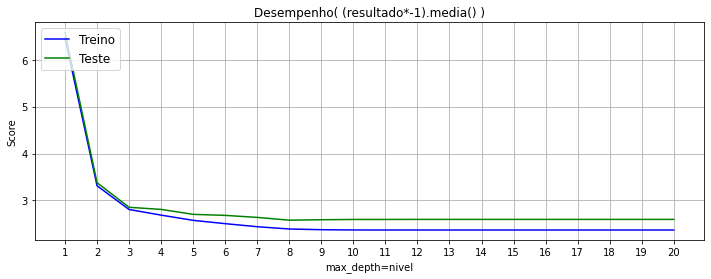

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( iteracoes, treino, color='blue', label = 'Treino')
plt.plot( iteracoes, teste, color='green', label = 'Teste')
plt.title('Desempenho( (resultado*-1).media() )')
plt.xlabel('max_depth=nivel')
plt.ylabel('Score')
plt.legend(loc='upper left',fontsize = 12)
plt.xticks(iteracoes)
plt.grid('True')
plt.show()

In [ ]:
data = {'treino':  treino,'teste': teste}

resultadoso = pd.DataFrame(data, columns = ['Treino','Teste'])

print (resultadoso)

Empty DataFrame
Columns: [Treino, Teste]
Index: []


In [ ]:
resultadoso['Treino'] = treino
resultadoso['Teste'] = teste

In [ ]:
resultadoso

,Treino,Teste
0,6.470920,6.587746
1,3.311802,3.377768
2,2.805510,2.852411
3,2.685286,2.807658
4,2.573975,2.701978
5,2.503333,2.680081
6,2.437895,2.636768
7,2.389215,2.577578
8,2.374560,2.586701
9,2.368619,2.592815


Text(0, 0.5, 'Score')

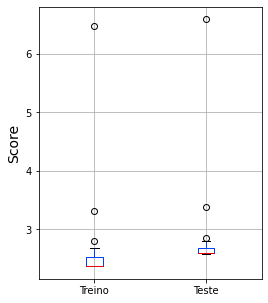

In [ ]:
resultadoso.boxplot(figsize=(4, 5),column=['Treino','Teste'])
plt.ylabel("Score", fontsize = 14)

In [ ]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [ ]:
SEED= 1232
np.random.seed(SEED)
partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3) # resgatar a melhor performance
modelo_arvore.fit(x_treino, y_treino) # aprende
predicoes = modelo_arvore.predict(x_teste) #prever
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados) # para encontrar o intervalo de confiança

Intervalo de confiança 2.3921871267404473 - 3.294134482969481


# Métricas de avaliação do teste ( Árvore de decisão )

In [ ]:
temporario = y_teste.copy()
temporario

,series
12814,-0.413290
16247,6.491042
16137,7.947216
16606,3.308020
2181,-0.663263
...,...
1464,-0.413290
13297,-0.663263
13731,-0.663263
11351,-0.413290


In [ ]:
temporario['series'] = predicoes.reshape(3584,1).copy()
temporario

,series
12814,-0.419455
16247,5.390273
16137,5.390273
16606,1.705140
2181,-0.419455
...,...
1464,-0.419455
13297,0.236747
13731,0.236747
11351,-0.419455


In [ ]:
predicoes.reshape(3584,1)

array([[-0.41945489],
       [ 5.39027334],
       [ 5.39027334],
       ...,
       [ 0.23674683],
       [-0.41945489],
       [-0.41945489]])

In [ ]:
y_teste

,series
12814,-0.413290
16247,6.491042
16137,7.947216
16606,3.308020
2181,-0.663263
...,...
1464,-0.413290
13297,-0.663263
13731,-0.663263
11351,-0.413290


Encontrando o NSE e o MAE

NSE = series    0.689999
dtype: float64
MAE = 0.8899527381875796


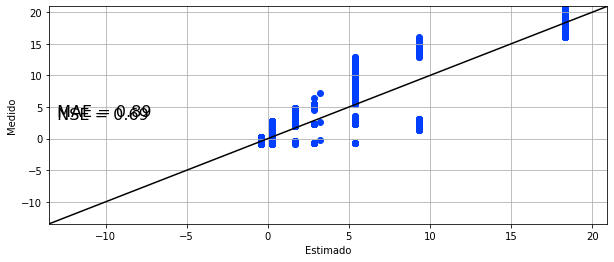

In [ ]:
from sklearn.metrics import mean_absolute_error
#predicoes = predicoes.reshape(1404, 1)
Min = series.min()
Max = series.max()
plt.figure(figsize=(10,4))
plt.scatter(temporario, y_teste)
plt.plot([Min,Max],[Min,Max],'-', c = 'black')
plt.ylim([Min,Max])
plt.xlim([Min,Max])
plt.xticks()
plt.xlabel("Estimado")
plt.yticks()
plt.ylabel("Medido")
plt.grid(True)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)
plt.text(Min+.2,.13*Max+.3," NSE = %.2f"%(NSE(y_teste, temporario)), size = 16)
plt.text(Min+.2,.13*Max+.9," MAE = %.2f"%(mean_absolute_error(y_teste, temporario)), size = 16)
print('NSE =',NSE(y_teste, temporario))
print('MAE =', mean_absolute_error(y_teste, temporario))

In [ ]:
# A eficiência de modelagem Nash e Sutcliffe (NASH e SUTCLIFFE, 1970) limitado (NSE)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)

print('NSE =',NSE(y_teste, temporario))

NSE = series    0.689999
dtype: float64


In [ ]:
# o índice de concordância de Willmott (d)
def d(medido, estimado):
    medido_medio = np.mean( medido )
    s = np.sum( ( estimado - medido )**2 )
    i = np.sum(np.absolute( estimado - medido_medio ) + np.absolute( medido - medido_medio ))
    
    return 1 - s/i

print('d =',d(y_teste, temporario))

d = series    0.380799
dtype: float64


In [ ]:
# coeficiente de correlação de Pearson (r)
def r(medido, estimado):
    medido_medio = np.mean( medido )
    estimado_medio = np.mean( estimado )
    s = np.sum((medido - medido_medio)*(estimado - estimado_medio))
    i = ((np.sum((estimado - estimado_medio)**(2)))**(1/2))*((np.sum((medido - medido_medio)**(2)))**(1/2))

    return s/i

print('r =',r(y_teste, temporario))

r = series    0.903674
dtype: float64


In [ ]:
# O índice de desempenho do modelo (c)
def c(medido, estimado):
    return d(medido, estimado)*r(medido, estimado)

print('c =',c(y_teste, temporario))

c = series    0.344118
dtype: float64


In [ ]:
# Coeficiente de Klinga – Gupta limitado (KGE)
def KGE(medido, estimado):
    desvio_padrao_medido = np.std(medido)
    desvio_padrao_estimado = np.std(estimado)
    estimado_medio = np.mean( estimado )
    kge = 1 - ( (r(medido, estimado) - 1)**2 + ((estimado_medio/medido) - 1)**2 + ((desvio_padrao_estimado/desvio_padrao_medido) - 1)**2 )**(1/2)

    return kge/(2 - kge)

print('KGE =',np.mean(KGE(y_teste, temporario)))

KGE = series   -0.368285
dtype: float64


In [ ]:
# R²
def R2(medido, estimado):
    cima = (len(medido)*(np.sum(medido*estimado))-np.sum(medido)*np.sum(estimado))**2
    baixo = (len(medido)*np.sum((medido)**2)-(np.sum(medido))**2)*(len(medido)*np.sum((estimado)**2)-(np.sum(medido))**2)
    r2 = cima/baixo
    return r2

print(f'R² ={R2(y_teste, temporario)}')

R² =series    0.8161
dtype: float64


In [ ]:
#RMSE -  Raiz do Erro Quadrático Médio
def RMSE(medido, estimado):
    rmse = ((1/len(medido))*(np.sum((medido - estimado)**2)))**(1/2)
    return rmse

print(f'RMSE ={RMSE(y_teste, temporario)}')

RMSE =series    1.6905
dtype: float64


outras metricas


In [ ]:
from sklearn.metrics import explained_variance_score
# Variância explicada 
explained_variance_score(y_teste, temporario)

0.8165677699280561

In [ ]:
from sklearn.metrics import max_error
# Erro máximo ( residual )
max_error(y_teste, temporario)

8.028149131250775

In [ ]:
from sklearn.metrics import mean_absolute_error
# Erro médio absoluto MAE
mean_absolute_error(y_teste, temporario)

0.8899527381875796

In [ ]:
from sklearn.metrics import mean_squared_error
# Erro quadrático médio
mean_squared_error(y_teste, temporario)

2.8577903403633846

In [ ]:
from sklearn.metrics import r2_score
# score R² 
r2_score(y_teste, temporario)

0.8165670491067555

In [ ]:
#Artur pediu a raiz o r² como parâmetro avaliativo
(r2_score(y_teste, temporario))**(1/2)

0.9036409956983777

In [ ]:
from sklearn.metrics import mean_squared_log_error
# Erro logarítmico médio quadrático
mean_squared_log_error(abs(y_teste), abs(temporario))

0.12098206966586045

In [ ]:
#Erro absoluto mediano 
from sklearn.metrics import median_absolute_error
median_absolute_error(y_teste, temporario)

0.2558995853902103

# Regressão de floresta aleatória

In [ ]:
#entrada = [['tempmedpoceano', 'laninalanino', 'pressaoatmPa', 'tempsolo', 'velocidadedovento']]
# saida = ['ultimo']  já que normalizamos os dados de chuva, então esses não vão ser usados

#[['DoY', 'Tair', 'UR', 'Velocidade_do_vento', 'Rn']]
#dados[entrada]
#valor_saida = dados[saida]
# já que normalizamos os dados
valor_saida = dados[['series']]
valor_entrada = dados[['W_10cm']]

In [ ]:
x = valor_entrada
y = valor_saida

Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split
#qualquer valor
SEED = 0 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state=SEED)


In [ ]:
len(x_treino)

8361

In [ ]:
len(y_treino)

8361

In [ ]:
x_treino

,W_10cm
15680,0.105
14823,0.036
14971,0.035
1645,0.036
14956,0.035
...,...
10205,0.055
6162,0.069
15374,0.157
16331,0.056


In [ ]:
y_treino

,series
15680,15.344778
14823,-0.413290
14971,-0.413290
1645,-0.413290
14956,-0.413290
...,...
10205,-0.663263
6162,2.320816
15374,20.471040
16331,6.003851


In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#modelo = RandomForestRegressor(max_depth=2, random_state=0)
#modelo.fit(x_treino, y_treino)
#predicoes = modelo.predict(x_teste)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
def regressor_arvore(nivel):
    SEED= 0
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = RandomForestRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y.values.ravel(), cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Nivel {nivel} | Treino = {(resultados['train_score']*-1).mean()} | Teste = {(resultados['test_score']*-1).mean()}")
    treino.append((resultados['train_score']*-1).mean())
    teste.append((resultados['test_score']*-1).mean())

In [ ]:
iteracoes = []
treino = []
teste = []
for i in range(1,21):
    resultados = regressor_arvore(i)
    iteracoes.append(i)

Nivel 1 | Treino = 5.185100711590112 | Teste = 5.307682046760459
Nivel 2 | Treino = 3.0543726120794306 | Teste = 3.106403940879903
Nivel 3 | Treino = 2.743882558264254 | Teste = 2.800737823753377
Nivel 4 | Treino = 2.614665385489471 | Teste = 2.6996344902554172
Nivel 5 | Treino = 2.5180363989615566 | Teste = 2.6341591304136065
Nivel 6 | Treino = 2.436039954638953 | Teste = 2.5818013961399218
Nivel 7 | Treino = 2.3940273912831813 | Teste = 2.5606322719938697
Nivel 8 | Treino = 2.378116051357305 | Teste = 2.5677436732056416
Nivel 9 | Treino = 2.3739735915948987 | Teste = 2.5809697117473345
Nivel 10 | Treino = 2.372899980048936 | Teste = 2.5896220067092455
Nivel 11 | Treino = 2.372765756631024 | Teste = 2.592776421042717
Nivel 12 | Treino = 2.37271640115108 | Teste = 2.5940370077086627
Nivel 13 | Treino = 2.3727152551214323 | Teste = 2.59445496426006
Nivel 14 | Treino = 2.3727223265780966 | Teste = 2.594464745289193
Nivel 15 | Treino = 2.3727218365578104 | Teste = 2.5944678768685265
Nivel

Resultado da validação cruzada

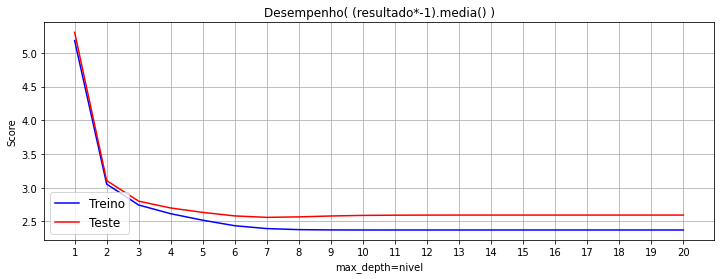

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( iteracoes, treino, color=(0.0, 0.0, 1.0, 1), label = 'Treino')
plt.plot( iteracoes, teste, color=(1.0, 0.0, 0.0, 1), label = 'Teste')
plt.title('Desempenho( (resultado*-1).media() )')
plt.xlabel('max_depth=nivel')
plt.ylabel('Score')
plt.legend(loc='lower left',fontsize = 12)
plt.xticks(iteracoes)
plt.grid('True')
plt.show()

In [ ]:
data = {'treino':  treino,'teste': teste}
resultadoso = pd.DataFrame(data, columns = ['Treino','Teste'])
print (resultadoso)

Empty DataFrame
Columns: [Treino, Teste]
Index: []


In [ ]:
resultadoso['Treino'] = treino
resultadoso['Teste'] = teste

In [ ]:
resultadoso

,Treino,Teste
0,5.185101,5.307682
1,3.054373,3.106404
2,2.743883,2.800738
3,2.614665,2.699634
4,2.518036,2.634159
5,2.436040,2.581801
6,2.394027,2.560632
7,2.378116,2.567744
8,2.373974,2.580970
9,2.372900,2.589622


Text(0, 0.5, 'Score')

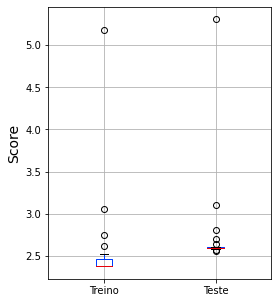

In [ ]:
resultadoso.boxplot(figsize=(4, 5),column=['Treino','Teste'])
plt.ylabel("Score", fontsize = 14)

In [ ]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [ ]:
SEED= 1232
np.random.seed(SEED)
partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = RandomForestRegressor(max_depth=3) # resgatar a melhor performance
modelo_arvore.fit(x_treino, y_treino.values.ravel()) # aprende
predicoes = modelo_arvore.predict(x_teste) #prever
resultados = cross_validate(modelo_arvore, x, y.values.ravel(), cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados) # para encontrar o intervalo de confiança

Intervalo de confiança 2.5040530978818225 - 3.131267160003852


# Métricas de avaliação do teste ( Floresta aleatória )

In [ ]:
temporario = y_teste.copy()
temporario

,series
12814,-0.413290
16247,6.491042
16137,7.947216
16606,3.308020
2181,-0.663263
...,...
1464,-0.413290
13297,-0.663263
13731,-0.663263
11351,-0.413290


In [ ]:
temporario['series'] = predicoes.reshape(3584,1).copy()
temporario

,series
12814,-0.351786
16247,5.045108
16137,5.074187
16606,1.511447
2181,-0.351786
...,...
1464,-0.351786
13297,0.270754
13731,0.270754
11351,-0.351786


In [ ]:
predicoes.reshape(3584,1)

array([[-0.3517861 ],
       [ 5.04510784],
       [ 5.07418655],
       ...,
       [ 0.27075407],
       [-0.3517861 ],
       [-0.3517861 ]])

In [ ]:
y_teste

,series
12814,-0.413290
16247,6.491042
16137,7.947216
16606,3.308020
2181,-0.663263
...,...
1464,-0.413290
13297,-0.663263
13731,-0.663263
11351,-0.413290


Encontrando o NSE e o MAE

NSE = series    0.702119
dtype: float64
MAE = 0.8951089858704069


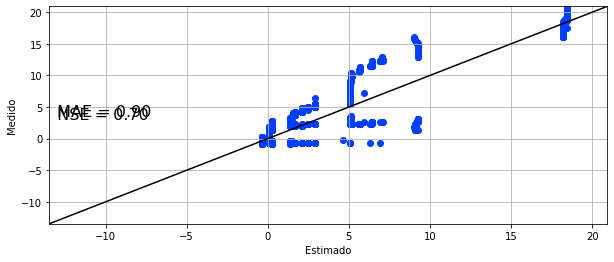

In [ ]:
from sklearn.metrics import mean_absolute_error
#predicoes = predicoes.reshape(1404, 1)
Min = series.min()
Max = series.max()
plt.figure(figsize=(10,4))
plt.scatter(temporario, y_teste)
plt.plot([Min,Max],[Min,Max],'-', c = 'black')
plt.ylim([Min,Max])
plt.xlim([Min,Max])
plt.xticks()
plt.xlabel("Estimado")
plt.yticks()
plt.ylabel("Medido")
plt.grid(True)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)
plt.text(Min+.2,.13*Max+.3," NSE = %.2f"%(NSE(y_teste, temporario)), size = 16)
plt.text(Min+.2,.13*Max+.9," MAE = %.2f"%(mean_absolute_error(y_teste, temporario)), size = 16)
print('NSE =',NSE(y_teste, temporario))
print('MAE =', mean_absolute_error(y_teste, temporario))

In [ ]:
# A eficiência de modelagem Nash e Sutcliffe (NASH e SUTCLIFFE, 1970) limitado (NSE)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)

print('NSE =',NSE(y_teste, temporario))

NSE = series    0.702119
dtype: float64


In [ ]:
# o índice de concordância de Willmott (d)
def d(medido, estimado):
    medido_medio = np.mean( medido )
    s = np.sum( ( estimado - medido )**2 )
    i = np.sum(np.absolute( estimado - medido_medio ) + np.absolute( medido - medido_medio ))
    
    return 1 - s/i

print('d =',d(y_teste, temporario))

d = series    0.407475
dtype: float64


In [ ]:
# coeficiente de correlação de Pearson (r)
def r(medido, estimado):
    medido_medio = np.mean( medido )
    estimado_medio = np.mean( estimado )
    s = np.sum((medido - medido_medio)*(estimado - estimado_medio))
    i = ((np.sum((estimado - estimado_medio)**(2)))**(1/2))*((np.sum((medido - medido_medio)**(2)))**(1/2))

    return s/i

print('r =',r(y_teste, temporario))

r = series    0.908301
dtype: float64


In [ ]:
# O índice de desempenho do modelo (c)
def c(medido, estimado):
    return d(medido, estimado)*r(medido, estimado)

print('c =',c(y_teste, temporario))

c = series    0.37011
dtype: float64


In [ ]:
# Coeficiente de Klinga – Gupta limitado (KGE)
def KGE(medido, estimado):
    desvio_padrao_medido = np.std(medido)
    desvio_padrao_estimado = np.std(estimado)
    estimado_medio = np.mean( estimado )
    kge = 1 - ( (r(medido, estimado) - 1)**2 + ((estimado_medio/medido) - 1)**2 + ((desvio_padrao_estimado/desvio_padrao_medido) - 1)**2 )**(1/2)

    return kge/(2 - kge)

print('KGE =',np.mean(KGE(y_teste, temporario)))

KGE = series   -0.369017
dtype: float64


In [ ]:
# R²
def R2(medido, estimado):
    cima = (len(medido)*(np.sum(medido*estimado))-np.sum(medido)*np.sum(estimado))**2
    baixo = (len(medido)*np.sum((medido)**2)-(np.sum(medido))**2)*(len(medido)*np.sum((estimado)**2)-(np.sum(medido))**2)
    r2 = cima/baixo
    return r2

print(f'R² ={R2(y_teste, temporario)}')

R² =series    0.822923
dtype: float64


In [ ]:
#RMSE -  Raiz do Erro Quadrático Médio
def RMSE(medido, estimado):
    rmse = ((1/len(medido))*(np.sum((medido - estimado)**2)))**(1/2)
    return rmse

print(f'RMSE ={RMSE(y_teste, temporario)}')

RMSE =series    1.651214
dtype: float64


outras metricas


In [ ]:
from sklearn.metrics import explained_variance_score
# Variância explicada 
explained_variance_score(y_teste, temporario)

0.8250047615862972

In [ ]:
from sklearn.metrics import max_error
# Erro máximo ( residual )
max_error(y_teste, temporario)

7.913203566155956

In [ ]:
from sklearn.metrics import mean_absolute_error
# Erro médio absoluto MAE
mean_absolute_error(y_teste, temporario)

0.8951089858704069

In [ ]:
from sklearn.metrics import mean_squared_error
# Erro quadrático médio
mean_squared_error(y_teste, temporario)

2.7265075077199414

In [ ]:
from sklearn.metrics import r2_score
# score R² 
r2_score(y_teste, temporario)

0.8249936985545063

In [ ]:
#Artur pediu a raiz o r² como parâmetro avaliativo
(r2_score(y_teste, temporario))**(1/2)

0.9082916373910455

In [ ]:
from sklearn.metrics import mean_squared_log_error
# Erro logarítmico médio quadrático
mean_squared_log_error(abs(y_teste), abs(temporario))

0.12651220434137844

In [ ]:
#Erro absoluto mediano 
from sklearn.metrics import median_absolute_error
median_absolute_error(y_teste, temporario)

0.3114764480639805

# Redes neurais artificiais

In [ ]:
#entrada = [['tempmedpoceano', 'laninalanino', 'pressaoatmPa', 'tempsolo', 'velocidadedovento']]
# saida = ['ultimo']  já que normalizamos os dados de chuva, então esses não vão ser usados

#[['DoY', 'Tair', 'UR', 'Velocidade_do_vento', 'Rn']]
#dados[entrada]
#valor_saida = dados[saida]
# já que normalizamos os dados
valor_saida = dados[['series']]
valor_entrada = dados[['W_10cm']] 

In [ ]:
x = valor_entrada
y = valor_saida

Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split
#qualquer valor
SEED = 0 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state=SEED)


In [ ]:
len(x_treino)

8361

In [ ]:
len(y_treino)

8361

In [ ]:
x_treino

,W_10cm
15680,0.105
14823,0.036
14971,0.035
1645,0.036
14956,0.035
...,...
10205,0.055
6162,0.069
15374,0.157
16331,0.056


In [ ]:
y_treino

,series
15680,15.344778
14823,-0.413290
14971,-0.413290
1645,-0.413290
14956,-0.413290
...,...
10205,-0.663263
6162,2.320816
15374,20.471040
16331,6.003851


In [ ]:
maior_nse = np.zeros(shape=(11,11))

In [ ]:
print(maior_nse)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)

In [ ]:
from sklearn.neural_network import MLPClassifier
for i in range(10):
    for j in range(10):
        clf = MLPClassifier(solver='sgd', max_iter=1200, alpha=1e-5,
                            hidden_layer_sizes=(j+1, i+1), random_state=1)
        y_treino=y_treino.astype('int')
        clf.fit(x_treino, y_treino.values.ravel())
        predicoes = clf.predict(x_teste)
        maior_nse[j][i] = NSE(y_teste, predicoes.reshape(3584,1))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

In [ ]:
print(maior_nse)

[[-0.04718026 -0.04718026 -0.04718026 -0.04718026 -0.04718026 -0.04718026
  -0.04718026 -0.04718026 -0.04718026 -0.04718026  0.        ]
 [-0.04718026 -0.04718026 -0.04718026 -0.04718026 -0.04718026 -0.04718026
  -0.04718026 -0.04718026 -0.04718026 -0.04718026  0.        ]
 [-0.04718026 -0.04718026 -0.04718026 -0.04718026 -0.04718026 -0.04718026
  -0.04718026 -0.04718026 -0.04718026 -0.04718026  0.        ]
 [-0.04718026 -0.04718026 -0.04718026 -0.04718026 -0.04718026 -0.04718026
  -0.04718026 -0.04718026 -0.04718026 -0.04718026  0.        ]
 [-0.04718026 -0.04718026 -0.04718026 -0.04718026 -0.04718026 -0.04718026
  -0.04718026  0.10891828 -0.04718026 -0.04718026  0.        ]
 [-0.04718026 -0.04718026  0.10680194  0.10680194 -0.04718026 -0.04718026
  -0.04718026 -0.04718026 -0.04718026 -0.04718026  0.        ]
 [-0.04718026 -0.04718026 -0.04718026  0.10680194  0.10680194 -0.04718026
   0.10891828  0.10680194  0.10891828  0.10891828  0.        ]
 [-0.04718026 -0.04718026 -0.04718026 -0.

In [ ]:
resultado = np.amax(maior_nse)
print('O valor é : ', resultado)

O valor é :  0.4787054915196478


In [ ]:
# Encontrar a posição do melhor NSE
resultado = np.where(maior_nse == np.amax(maior_nse))
print('O valor é : ', resultado)
print('A posição é : ')
posicoes = list(zip(resultado[0], resultado[1]))
for cord in posicoes:
    print(cord)

O valor é :  (array([7]), array([7]))
A posição é : 
(7, 7)


In [ ]:
clf = MLPClassifier(solver='sgd', max_iter=1200, alpha=1e-5, hidden_layer_sizes=cord, random_state=1)

clf.fit(x_treino, y_treino.astype('int').values.ravel())


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 7), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predicoes = clf.predict(x_teste)

# Métricas de avaliação do teste ( Redes neurais artificiais )

In [ ]:
temporario = y_teste.copy()
temporario

,series
12814,-0.413290
16247,6.491042
16137,7.947216
16606,3.308020
2181,-0.663263
...,...
1464,-0.413290
13297,-0.663263
13731,-0.663263
11351,-0.413290


In [ ]:
temporario['series'] = predicoes.reshape(3584,1).copy()
temporario

,series
12814,0
16247,2
16137,2
16606,0
2181,0
...,...
1464,0
13297,0
13731,0
11351,0


In [ ]:
predicoes.reshape(3584,1)

array([[0],
       [2],
       [2],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_teste

,series
12814,-0.413290
16247,6.491042
16137,7.947216
16606,3.308020
2181,-0.663263
...,...
1464,-0.413290
13297,-0.663263
13731,-0.663263
11351,-0.413290


Encontrando o NSE e o MAE

NSE = series    0.108918
dtype: float64
MAE = 1.5213455836425156


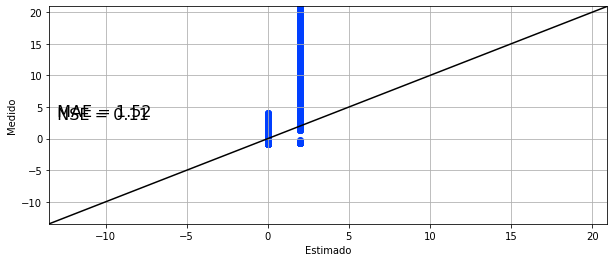

In [ ]:
from sklearn.metrics import mean_absolute_error
#predicoes = predicoes.reshape(1404, 1)
Min = series.min()
Max = series.max()
plt.figure(figsize=(10,4))
plt.scatter(temporario, y_teste)
plt.plot([Min,Max],[Min,Max],'-', c = 'black')
plt.ylim([Min,Max])
plt.xlim([Min,Max])
plt.xticks()
plt.xlabel("Estimado")
plt.yticks()
plt.ylabel("Medido")
plt.grid(True)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)
plt.text(Min+.2,.13*Max+.3," NSE = %.2f"%(NSE(y_teste, temporario)), size = 16)
plt.text(Min+.2,.13*Max+.9," MAE = %.2f"%(mean_absolute_error(y_teste, temporario)), size = 16)
print('NSE =',NSE(y_teste, temporario))
print('MAE =', mean_absolute_error(y_teste, temporario))

In [ ]:
# A eficiência de modelagem Nash e Sutcliffe (NASH e SUTCLIFFE, 1970) limitado (NSE)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)

print('NSE =',NSE(y_teste, temporario))

NSE = series    0.108918
dtype: float64


In [ ]:
# o índice de concordância de Willmott (d)
def d(medido, estimado):
    medido_medio = np.mean( medido )
    s = np.sum( ( estimado - medido )**2 )
    i = np.sum(np.absolute( estimado - medido_medio ) + np.absolute( medido - medido_medio ))
    
    return 1 - s/i

print('d =',d(y_teste, temporario))

d = series   -2.531486
dtype: float64


In [ ]:
# coeficiente de correlação de Pearson (r)
def r(medido, estimado):
    medido_medio = np.mean( medido )
    estimado_medio = np.mean( estimado )
    s = np.sum((medido - medido_medio)*(estimado - estimado_medio))
    i = ((np.sum((estimado - estimado_medio)**(2)))**(1/2))*((np.sum((medido - medido_medio)**(2)))**(1/2))

    return s/i

print('r =',r(y_teste, temporario))

r = series    0.719822
dtype: float64


In [ ]:
# O índice de desempenho do modelo (c)
def c(medido, estimado):
    return d(medido, estimado)*r(medido, estimado)

print('c =',c(y_teste, temporario))

c = series   -1.822219
dtype: float64


In [ ]:
# Coeficiente de Klinga – Gupta limitado (KGE)
def KGE(medido, estimado):
    desvio_padrao_medido = np.std(medido)
    desvio_padrao_estimado = np.std(estimado)
    estimado_medio = np.mean( estimado )
    kge = 1 - ( (r(medido, estimado) - 1)**2 + ((estimado_medio/medido) - 1)**2 + ((desvio_padrao_estimado/desvio_padrao_medido) - 1)**2 )**(1/2)

    return kge/(2 - kge)

print('KGE =',np.mean(KGE(y_teste, temporario)))

KGE = series   -0.281819
dtype: float64


In [ ]:
# R²
def R2(medido, estimado):
    cima = (len(medido)*(np.sum(medido*estimado))-np.sum(medido)*np.sum(estimado))**2
    baixo = (len(medido)*np.sum((medido)**2)-(np.sum(medido))**2)*(len(medido)*np.sum((estimado)**2)-(np.sum(medido))**2)
    r2 = cima/baixo
    return r2

print(f'R² ={R2(y_teste, temporario)}')

R² =series   -0.393172
dtype: float64


In [ ]:
#RMSE -  Raiz do Erro Quadrático Médio
def RMSE(medido, estimado):
    rmse = ((1/len(medido))*(np.sum((medido - estimado)**2)))**(1/2)
    return rmse

print(f'RMSE ={RMSE(y_teste, temporario)}')

RMSE =series    3.538225
dtype: float64


outras metricas


In [ ]:
from sklearn.metrics import explained_variance_score
# Variância explicada 
explained_variance_score(y_teste, temporario)

0.24501456591336634

In [ ]:
from sklearn.metrics import max_error
# Erro máximo ( residual )
max_error(y_teste, temporario)

18.93213940509096

In [ ]:
from sklearn.metrics import mean_absolute_error
# Erro médio absoluto MAE
mean_absolute_error(y_teste, temporario)

1.5213455836425156

In [ ]:
from sklearn.metrics import mean_squared_error
# Erro quadrático médio
mean_squared_error(y_teste, temporario)

12.519039190848869

In [ ]:
from sklearn.metrics import r2_score
# score R² 
r2_score(y_teste, temporario)

0.19644059653669954

In [ ]:
#Artur pediu a raiz o r² como parâmetro avaliativo
(r2_score(y_teste, temporario))**(1/2)

0.4432161961579242

In [ ]:
from sklearn.metrics import mean_squared_log_error
# Erro logarítmico médio quadrático
mean_squared_log_error(abs(y_teste), abs(temporario))

0.40648019962914755

In [ ]:
#Erro absoluto mediano 
from sklearn.metrics import median_absolute_error
median_absolute_error(y_teste, temporario)

0.41329005977265876